In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel(r'C:\Users\PRABHAT\Downloads\DataSet Project.xlsx')

In [4]:
data.head()

,Order ID,Order Date,Customer ID,Customer Name,Address,City,State,ZIP/Postal Code,Country/Region,Salesperson,...,Ship Country/Region,Payment Type,Product Name,Category,Unit Price,Quantity,Revenue,Profit,Discount %,Shipping Fee
0,1001,2014-01-27,27,Company AA,789 27th Street,Las Vegas,NV,99999,USA,Mariya Sergienko,...,USA,Check,Beer,Beverages,14.0,49,686.0,171.500,0.7,66.5420
1,1002,2014-01-27,27,Company AA,789 27th Street,Las Vegas,NV,99999,USA,Mariya Sergienko,...,USA,Check,Dried Plums,Dried Fruit & Nuts,3.5,47,164.5,41.125,0.7,16.6145
2,1003,2014-01-04,4,Company D,123 4th Street,New York,NY,99999,USA,Andrew Cencini,...,USA,Credit Card,Dried Pears,Dried Fruit & Nuts,30.0,69,2070.0,517.500,0.5,198.7200
3,1004,2014-01-04,4,Company D,123 4th Street,New York,NY,99999,USA,Andrew Cencini,...,USA,Credit Card,Dried Apples,Dried Fruit & Nuts,53.0,89,4717.0,1179.250,0.1,448.1150
4,1005,2014-01-04,4,Company D,123 4th Street,New York,NY,99999,USA,Andrew Cencini,...,USA,Credit Card,Dried Plums,Dried Fruit & Nuts,3.5,11,38.5,9.625,0.4,3.7345


In [33]:
data.columns

Index(['Order ID', 'Order Date', 'Customer ID', 'Customer Name', 'Address',
       'City', 'State', 'ZIP/Postal Code', 'Country/Region', 'Salesperson',
       'Region', 'Shipped Date', 'Shipper Name', 'Ship Name', 'Ship Address',
       'Ship City', 'Ship State', 'Ship ZIP/Postal Code',
       'Ship Country/Region', 'Payment Type', 'Product Name', 'Category',
       'Unit Price', 'Quantity', 'Revenue', 'Profit', 'Discount %',
       'Shipping Fee'],
      dtype='object')

In [5]:
'''1) Sales Person by Report Revenue
2) Payment Type BarPlot
3) Scatterplot Matplotlib Qty vs Revenue
4) Customerwise top customers Revenue BarPlot
5) Monthswise Report LinePlot'''

'1) Sales Person by Report Revenue\n2) Payment Type BarPlot\n3) Scatterplot Matplotlib Qty vs Revenue\n4) Customerwise top customers Revenue BarPlot\n5) Monthswise Report LinePlot'

In [24]:
data1=data[['Salesperson','Revenue']].groupby(by='Salesperson').sum().sort_values(by='Revenue',ascending=False)
data1.index.nunique()

8

In [4]:
datax=data[['Salesperson','Revenue']].groupby(by='Salesperson').sum()
datax

,Revenue
Salesperson,
Andrew Cencini,77324.50
Anne Larsen,98351.33
Jan Kotas,17358.50
Laura Giussani,42178.51
Mariya Sergienko,45915.13
Michael Neipper,39214.00
Nancy Freehafer,112071.14
Robert Zare,33985.90


In [25]:
data1

,Revenue
Salesperson,
Nancy Freehafer,112071.14
Anne Larsen,98351.33
Andrew Cencini,77324.50
Mariya Sergienko,45915.13
Laura Giussani,42178.51
Michael Neipper,39214.00
Robert Zare,33985.90
Jan Kotas,17358.50


Text(0, 0.5, 'Revenue')

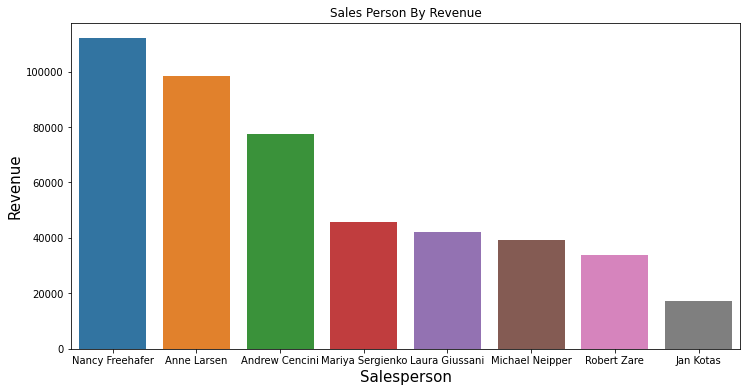

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(x=data1.index,y='Revenue',data=data1)
plt.title('Sales Person By Revenue')
plt.xlabel('Salesperson',fontsize=15)
plt.ylabel('Revenue',fontsize=15)

In [34]:
data2=data[['Payment Type','Revenue']].groupby(by='Payment Type').sum()

In [35]:
data2

,Revenue
Payment Type,
Cash,155563.30
Check,123493.35
Credit Card,187342.36


Text(0.5, 1.0, 'Payment type')

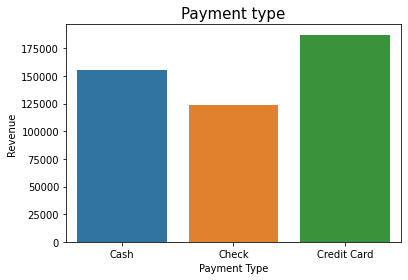

In [37]:
sns.barplot(x=data2.index,y='Revenue',data=data2)
plt.title('Payment type',fontsize=15)

In [40]:
data[['Quantity','Revenue']].head()

,Quantity,Revenue
0,49,686.0
1,47,164.5
2,69,2070.0
3,89,4717.0
4,11,38.5


Text(0.5, 1.0, 'Revenue VS Qty')

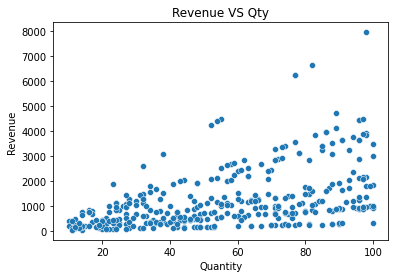

In [46]:
sns.scatterplot(x='Quantity',y='Revenue',data=data)
plt.title('Revenue VS Qty')

Text(0, 0.5, 'Quantity')

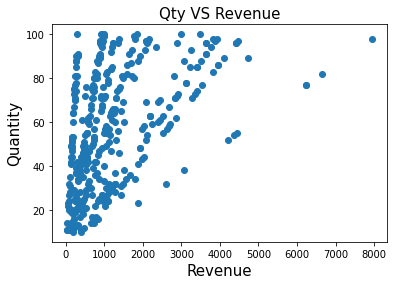

In [47]:
plt.scatter(x='Revenue',y='Quantity',data=data)
plt.title('Qty VS Revenue',fontsize=15)
plt.xlabel('Revenue',fontsize=15)
plt.ylabel('Quantity',fontsize=15)

In [14]:
data3=data[['Customer Name','Revenue']].groupby(by='Customer Name').sum().sort_values(by='Revenue',ascending=False)
data3.index.nunique()

15

In [4]:
data['Customer Name'].nunique()

15

<ipython-input-17-b1e98c3c9928>:3: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('RevenueVsCustomer.jpg',bbox='inch')


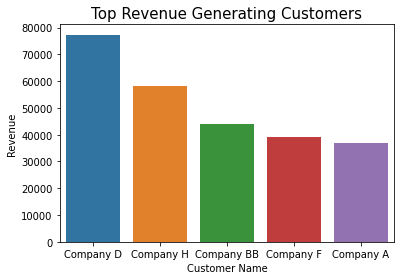

In [17]:
sns.barplot(x=data3.index[0:5],y='Revenue',data=data3[0:5])
plt.title('Top Revenue Generating Customers',fontsize=15)
plt.savefig('RevenueVsCustomer.jpg',bbox='inch')

In [19]:
import cufflinks as ccf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [20]:
init_notebook_mode=True
ccf.go_offline()

In [21]:
data3plotly=data3[0:5]
data3plotly.iplot(kind='bar')

In [6]:
from datetime import datetime

In [7]:
def get_month(x):
    y=datetime.strftime(x,'%m')
    return y

In [3]:
month=pd.DatetimeIndex(data['Order Date']).month

In [4]:
month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
           dtype='int64', name='Order Date', length=389)

In [97]:
get_month("1999-03-25")

In [34]:
d=datetime.strptime(s,"%d-%m-%Y")

In [36]:
d.month

5

In [8]:
data4=data[['Order Date','Revenue']]
data4['Month']=data4['Order Date'].apply(get_month)

<ipython-input-8-69aeb60e95b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['Month']=data4['Order Date'].apply(get_month)


In [9]:
data4=data4.groupby(by='Month').sum()

In [10]:
months=('Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec').split()

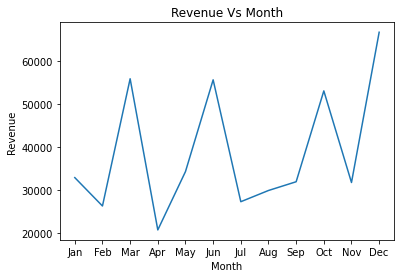

In [13]:
sns.lineplot(x=data4.index,y=data4['Revenue'],data=data4)
plt.title('Revenue Vs Month')
plt.xticks(data4.index,months)
plt.show()

In [4]:
data.head()

,Order ID,Order Date,Customer ID,Customer Name,Address,City,State,ZIP/Postal Code,Country/Region,Salesperson,...,Ship Country/Region,Payment Type,Product Name,Category,Unit Price,Quantity,Revenue,Profit,Discount %,Shipping Fee
0,1001,2014-01-27,27,Company AA,789 27th Street,Las Vegas,NV,99999,USA,Mariya Sergienko,...,USA,Check,Beer,Beverages,14.0,49,686.0,171.500,0.7,66.5420
1,1002,2014-01-27,27,Company AA,789 27th Street,Las Vegas,NV,99999,USA,Mariya Sergienko,...,USA,Check,Dried Plums,Dried Fruit & Nuts,3.5,47,164.5,41.125,0.7,16.6145
2,1003,2014-01-04,4,Company D,123 4th Street,New York,NY,99999,USA,Andrew Cencini,...,USA,Credit Card,Dried Pears,Dried Fruit & Nuts,30.0,69,2070.0,517.500,0.5,198.7200
3,1004,2014-01-04,4,Company D,123 4th Street,New York,NY,99999,USA,Andrew Cencini,...,USA,Credit Card,Dried Apples,Dried Fruit & Nuts,53.0,89,4717.0,1179.250,0.1,448.1150
4,1005,2014-01-04,4,Company D,123 4th Street,New York,NY,99999,USA,Andrew Cencini,...,USA,Credit Card,Dried Plums,Dried Fruit & Nuts,3.5,11,38.5,9.625,0.4,3.7345


In [9]:
#payment type revenue discount
data['Discount']=data['Discount %']*data['Revenue']/100

In [10]:
data.head()

,Order ID,Order Date,Customer ID,Customer Name,Address,City,State,ZIP/Postal Code,Country/Region,Salesperson,...,Payment Type,Product Name,Category,Unit Price,Quantity,Revenue,Profit,Discount %,Shipping Fee,Discount
0,1001,2014-01-27,27,Company AA,789 27th Street,Las Vegas,NV,99999,USA,Mariya Sergienko,...,Check,Beer,Beverages,14.0,49,686.0,171.500,0.7,66.5420,4.8020
1,1002,2014-01-27,27,Company AA,789 27th Street,Las Vegas,NV,99999,USA,Mariya Sergienko,...,Check,Dried Plums,Dried Fruit & Nuts,3.5,47,164.5,41.125,0.7,16.6145,1.1515
2,1003,2014-01-04,4,Company D,123 4th Street,New York,NY,99999,USA,Andrew Cencini,...,Credit Card,Dried Pears,Dried Fruit & Nuts,30.0,69,2070.0,517.500,0.5,198.7200,10.3500
3,1004,2014-01-04,4,Company D,123 4th Street,New York,NY,99999,USA,Andrew Cencini,...,Credit Card,Dried Apples,Dried Fruit & Nuts,53.0,89,4717.0,1179.250,0.1,448.1150,4.7170
4,1005,2014-01-04,4,Company D,123 4th Street,New York,NY,99999,USA,Andrew Cencini,...,Credit Card,Dried Plums,Dried Fruit & Nuts,3.5,11,38.5,9.625,0.4,3.7345,0.1540


In [11]:
#top3 salesperson,regionwise
#pie chart paymnt type profit
#konsi category kitne % biki

In [22]:
data6=data[['Salesperson','Revenue']].groupby(by='Salesperson').sum().sort_values(by='Revenue',ascending=False).head(3)

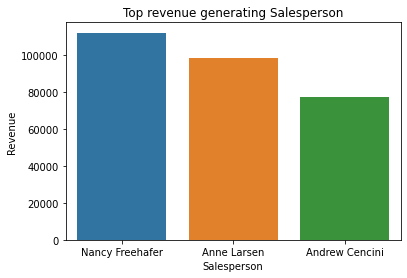

In [24]:
sns.barplot(x=data6.index,y='Revenue',data=data6)
plt.title('Top revenue generating Salesperson')
plt.savefig('RevenueVsSalesperson.jpg')

In [25]:
data7=data[['Region','Revenue']].groupby(by='Region').sum().sort_values(by='Revenue',ascending=False)
data7

,Revenue
Region,
North,151285.14
East,119503.01
South,98351.33
West,97259.53


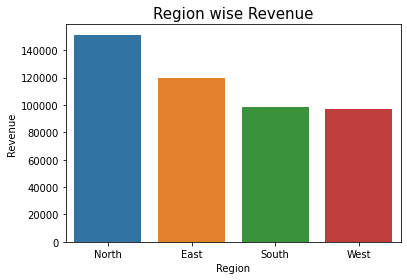

In [28]:
sns.barplot(x=data7.index,y='Revenue',data=data7)
plt.title('Region wise Revenue',fontsize=15)
plt.savefig('RegionVsRevenue.jpg')

In [29]:
data8=data[['Payment Type','Profit']].groupby(by='Payment Type').sum().sort_values(by='Profit',ascending=False)
data8

,Profit
Payment Type,
Credit Card,46835.5900
Cash,38890.8250
Check,30873.3375


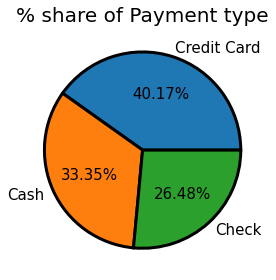

In [57]:

plt.pie(data8['Profit'],autopct='%0.2f%%',labels=data8.index,textprops={'size':15},wedgeprops={'linewidth':3,'edgecolor':'black'})
plt.title('% share of Payment type',fontsize=20)
plt.tight_layout()
plt.savefig('PaymentType Pie chart.jpg')

In [56]:
import os
os.remove('PaymentType Pie chart.jpg')

In [58]:
data.isnull().sum()

Order ID                 0
Order Date               0
Customer ID              0
Customer Name            0
Address                  0
City                     0
State                    0
ZIP/Postal Code          0
Country/Region           0
Salesperson              0
Region                   0
Shipped Date            81
Shipper Name            41
Ship Name                0
Ship Address             0
Ship City                0
Ship State               0
Ship ZIP/Postal Code     0
Ship Country/Region      0
Payment Type             0
Product Name             0
Category                 0
Unit Price               0
Quantity                 0
Revenue                  0
Profit                   0
Discount %               0
Shipping Fee             0
Discount                 0
dtype: int64

In [ ]:
data9=data[['Category','Revenue']].groupby(by='Category').sum()
data9

In [62]:
data9=data[['Category','Revenue']].groupby(by='Category').sum()

In [63]:
data9

,Revenue
Category,
Baked Goods & Mixes,20406.00
Beverages,112551.36
Candy,18041.25
Canned Meat,26661.60
Condiments,20758.00
Dairy Products,35704.80
Dried Fruit & Nuts,28623.00
Fruit & Veg,6942.00
Grains,3143.00


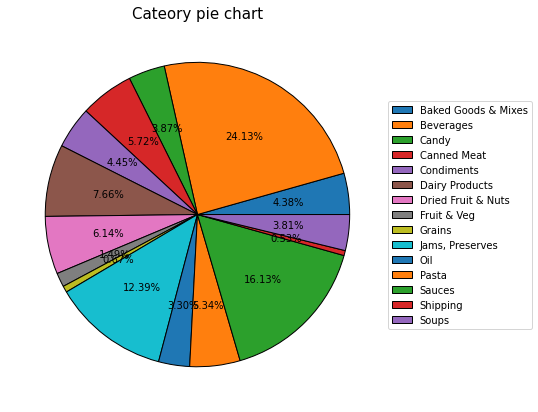

In [78]:
plt.figure(figsize=(12,7))
plt.pie(data9['Revenue'],autopct='%0.2f%%',wedgeprops={'linewidth':1,'edgecolor':'black'})
plt.legend(labels=data9.index,loc=[1,0.2])
plt.title('Cateory pie chart',fontsize=15)
plt.savefig('Category pie chart')
plt.show()